In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

In [13]:
data = pd.read_csv("/home/friday/Documents/MS/Coursework/2nd Sem/ML/asssign2/dataset/decision-tree.csv")

In [14]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [39]:
import pandas as pd
import numpy as np

# Define the ID3 Decision Tree class
class ID3DecisionTree:
    def __init__(self, min_samples_split=10):
        self.tree = None
        self.min_samples_split = min_samples_split

    def fit(self, X, y):
        self.tree = self._fit(X, y)

    def _fit(self, X, y):
        # Check if stopping condition is met
        if len(X) < self.min_samples_split or len(set(y)) == 1:
            return y.mode()[0]

        # Calculate Information Gain for each attribute
        best_attribute = self._choose_best_attribute(X, y)

        # Create a tree node for the best attribute
        tree_node = {'attribute': best_attribute, 'children': {}}

        # Recursively split the data and build the tree
        unique_values = X[best_attribute].unique()
        for value in unique_values:
            X_subset = X[X[best_attribute] == value].drop(columns=[best_attribute])
            y_subset = y[X[best_attribute] == value]
            tree_node['children'][value] = self._fit(X_subset, y_subset)

        return tree_node

    def _calculate_entropy(self, y):
        # Calculate the entropy of a list of labels
        entropy = 0
        total_count = len(y)
        for label in set(y):
            label_count = len(y[y == label])
            label_probability = label_count / total_count
            entropy -= label_probability * np.log2(label_probability)
        return entropy

    def _calculate_information_gain(self, X, y, attribute):
        # Calculate the Information Gain for a specific attribute
        entropy_parent = self._calculate_entropy(y)
        unique_values = X[attribute].unique()
        weighted_entropy_children = 0
        total_count = len(y)

        for value in unique_values:
            subset_indices = X[attribute] == value
            subset_y = y[subset_indices]
            subset_weight = len(subset_y) / total_count
            weighted_entropy_children += subset_weight * self._calculate_entropy(subset_y)

        information_gain = entropy_parent - weighted_entropy_children
        return information_gain

    def _choose_best_attribute(self, X, y):
        # Choose the best attribute based on Information Gain
        attributes = X.columns
        best_attribute = None
        best_information_gain = -1

        for attribute in attributes:
            information_gain = self._calculate_information_gain(X, y, attribute)
            if information_gain > best_information_gain:
                best_attribute = attribute
                best_information_gain = information_gain

        return best_attribute

    def predict(self, X):
        # Make predictions for a new dataset
        predictions = []
        for _, row in X.iterrows():
            predictions.append(self._predict_recursive(self.tree, row))
        return predictions

    def _predict_recursive(self, node, data_row):
        # Recursively traverse the tree to make a prediction
        if isinstance(node, dict):
            attribute = node['attribute']
            if data_row[attribute] in node['children']:
                return self._predict_recursive(node['children'][data_row[attribute]], data_row)
        return node

# Example usage
if __name__ == '__main__':
    # Load your dataset into a pandas dataframe
    # Replace 'your_data.csv' with the actual path to your dataset
    df = pd.read_csv('/home/friday/Documents/MS/Coursework/2nd Sem/ML/asssign2/dataset/decision-tree.csv')

    train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)
    # Split the data into features (X) and target (y)
    X = train_data.drop(columns=['Outcome'])
    y = train_data['Outcome']

    # Create and fit the ID3 Decision Tree
    tree = ID3DecisionTree(min_samples_split=10)
    tree.fit(X, y)

    # Make predictions for a new dataset
    # new_data = pd.DataFrame({'feature1': [value1, value2], 'feature2': [value3, value4]})
    val_X = val_data.drop(columns=['Outcome'])
    predictions = tree.predict(val_X)

    print(predictions)


[0, 1, 1, {'attribute': 'DiabetesPedigreeFunction', 'children': {0.304: 0, 1.282: 1, 0.654: 0, 0.254: 1, 0.238: 0, 0.472: 0, 0.302: 1, 0.326: 1, 0.415: 0, 0.258: 0, 0.509: 0, 0.479: 1, 0.229: 0, 0.189: 0, 0.299: 0, 1.114: 1, 0.294: 0, 0.867: 1, 0.226: 1, 0.88: 0, 0.619: 0, 0.695: 0, 0.088: 0, 0.488: 0, 0.722: 1, 0.743: 1, 0.245: 0, 0.27: 0, 0.19: 0, 0.358: 1, 1.224: 1, 0.597: 0, 0.527: 0, 0.471: 0, 0.129: 1, 0.733: 0, 0.248: 1, 0.207: 0, 0.569: 1, 0.231: 0, 0.243: 0, 0.547: 0, 0.572: 0, 0.154: 0, 0.757: 1, 0.356: 0, 0.3: 0, 0.378: 0, 1.6: 0, 0.696: 0, 0.649: 0, 0.336: 0, 0.197: 0, 0.731: 1, 0.591: 0, 0.43: 0, 0.66: 0, 0.452: 0, 0.427: 0, 0.955: 1, 0.252: 0, 0.2: 0, 0.199: 1, 0.767: 0, 0.526: 0, 0.285: 0, 0.142: 0, 0.141: 0, 0.905: 1, 0.804: 0, 0.122: 0, 0.156: 0, 0.26: 0, 0.159: 0, 0.365: 1, 0.16: 0, 0.183: 0, 1.699: 0, 0.268: 0, 0.692: 0, 0.933: 1, 0.206: 0, 0.237: 0, 0.343: 0, 0.284: 0, 0.337: 0, 0.259: 0, 0.407: 0, 0.605: 0, 0.233: 1, 0.614: 0, 1.022: 0, 0.687: 0, 0.463: 0, 0.349: 1

/home/friday/envs/deep/lib/python3.10/site-packages/sklearn/metrics/_classification.py:227: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
/home/friday/envs/deep/lib/python3.10/site-packages/sklearn/metrics/_classification.py:227: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
/home/friday/envs/deep/lib/python3.10/site-packages/sklearn/metrics/_classification.py:227: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
/home/friday/envs/deep/lib/python3.10/site-packages/sklearn/metrics/_classification.py:227: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred
/home/friday/envs/de

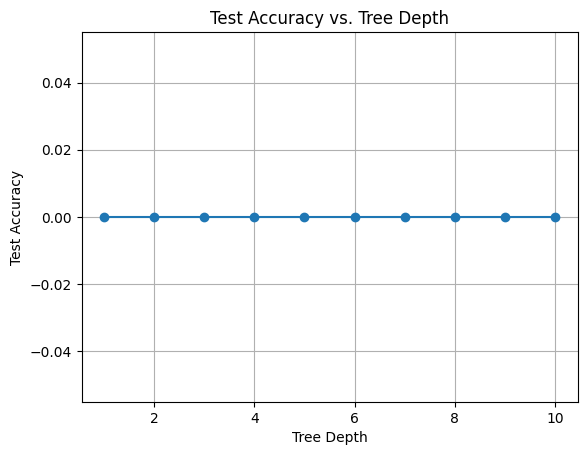

Pruned Decision Tree:
DiabetesPedigreeFunction
  [0.627]     Outcome
  [0.351]     Outcome
  [0.672]     Outcome
  [0.167]     Outcome
  [2.288]     Outcome
  [0.201]     Outcome
  [0.248]     Outcome
  [0.134]     Outcome
  [0.158]     Outcome
  [0.232]     Outcome
  [0.191]     Outcome
  [0.537]     Outcome
  [1.441]     Outcome
  [0.398]     Outcome
  [0.587]     Outcome
  [0.484]     Outcome
  [0.551]     Outcome
  [0.254]     Outcome
  [0.183]     Outcome
  [0.529]     Outcome
  [0.704]     Outcome
  [0.388]     Outcome
  [0.451]     Outcome
  [0.263]     Outcome
  [0.205]     Outcome
  [0.257]     Outcome
  [0.487]     Outcome
  [0.245]     Outcome
  [0.337]     Outcome
  [0.546]     Outcome
  [0.851]     Outcome
  [0.267]     Outcome
  [0.188]     Outcome
  [0.512]     Outcome
  [0.966]     Outcome
  [0.42]     Outcome
  [0.665]     Outcome
  [0.503]     Outcome
  [1.39]     Outcome
  [0.271]     Outcome
  [0.696]     Outcome
  [0.235]     Outcome
  [0.721]     Outcome
  [0.294]

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to prune the decision tree
def prune_tree(node, validation_data, target_col):
    if not node.children:
        return

    for value, child in node.children.items():
        prune_tree(child, validation_data, target_col)

    before_accuracy = evaluate_tree(node, validation_data, target_col)
    
    # Temporarily remove the subtree and evaluate accuracy
    original_children = node.children.copy()
    node.children = {}
    after_accuracy = evaluate_tree(node, validation_data, target_col)
    
    if after_accuracy >= before_accuracy:
        node.children = original_children

# Function to evaluate the accuracy of a decision tree on validation data
def evaluate_tree(node, data, target_col):
    predictions = []
    for index, row in data.iterrows():
        predictions.append(predict(node, row))
    return accuracy_score(data[target_col], predictions)

# Function to predict a single instance using the decision tree
def predict(node, instance):
    if not node.children:
        return node.target_col

    attribute_value = instance[node.split_attribute]
    if attribute_value in node.children:
        return predict(node.children[attribute_value], instance)
    else:
        return node.target_col

# Split the dataset into training and validation sets
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

# Prune the decision tree
prune_tree(tree, val_data, target_col)

# Plot test accuracy vs. tree depth
depths = []
test_accuracies = []

for depth in range(1, 11):
    pruned_tree, _ = id3(train_data, target_col, attributes)
    prune_tree(pruned_tree, val_data, target_col)
    test_accuracy = evaluate_tree(pruned_tree, val_data, target_col)
    depths.append(depth)
    test_accuracies.append(test_accuracy)

plt.plot(depths, test_accuracies, marker='o')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Tree Depth')
plt.grid(True)
plt.show()

# Print the pruned tree in hierarchical fashion with attributes
def print_pruned_tree(node, level=0):
    if not node:
        return

    if node.split_attribute:
        print(' ' * level + node.split_attribute)
        for value, child in node.children.items():
            print(' ' * (level + 2) + f'[{value}]', end=' ')
            print_pruned_tree(child, level + 4)
    else:
        print(' ' * level + node.target_col)

print("Pruned Decision Tree:")
print_pruned_tree(tree)

In [42]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

# Load the iris dataset as an example
X = data.drop(axis=1, columns=['Outcome']) 
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier instance
clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate macro precision
precision = precision_score(y_test, y_pred, average='macro')

# Calculate macro recall
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Macro Precision:", precision)
print("Macro Recall:", recall)

Accuracy: 0.7402597402597403
Macro Precision: 0.7234226447709594
Macro Recall: 0.7373737373737375
